In [27]:
from dataclasses import dataclass
import csv

import click
import requests
import psycopg2
import psycopg2.extras
import pandas.io.sql as sqlio
import ipympl 

import random 
# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
from collections import deque

In [28]:
import os 
print(os.getcwd())

d:\source\PesquisaMestradoFinal


Foram geradas as ações abaixo  
acao 0 = ["0.1,0.1,0.1,1,1","1,1,1,0.1,0.1","0.5,0.5,0.5,0.1,0.1","0.1,0.1,0.1,0.5,0.5","1,1,1,1,1"] 
Com as ações acima, foram criado cenários com 68 interação no ambiente
Ambiente é uma topologia de rede neural para resoluções de questões do tipo  multitarefas da base Clevr sem imagem  
Cada epsódio foi executado 3x e sua média computada 
Para cada média dos epsodios foram gerados :
     Grafico   
     DataBase para execução DQN 



In [29]:
#Carrega a media dos epsodios 
def LoadEp( acao ): 
    
    arquivo = pd.read_csv(acao)
    return arquivo
    

In [30]:
#Gera Database Para treinamento DQN 

def generateDataBaseEpsodi ( dataEpsopdios,  multi, power, episodes,DoneInteractions,TypeReward,intFactor,memory):
  state = [0,0,0,0,0]
  acumulativeReward = 0
  done = False
  print(episodes*intFactor)
  
  for epsodio in dataEpsopdios:
    for interaction in range(episodes*intFactor): 
   
      action = epsodio["acao"][interaction]  
      print('****************************************************** aqui ***********************')
      print(ast.literal_eval(epsodio["concat"][interaction])*power)
      stateNew = ast.literal_eval(epsodio["concat"][interaction])*power     
      if TypeReward == "MAX" :
        reward = multi*np.max(stateNew )
        if interaction <= DoneInteractions-1:
          acumulativeReward += reward
      elif TypeReward == "MIN" :
        reward = multi*np.min(stateNew )
        if interaction <= DoneInteractions-1:
          acumulativeReward += reward
      elif TypeReward == "AVARAGE" :
        reward = multi*np.avarage(stateNew )
        if interaction <= DoneInteractions-1:
          acumulativeReward += reward
      elif TypeReward == "MAX_LAST" :
        reward = multi*np.max(stateNew )
        if interaction == DoneInteractions-1:
          acumulativeReward = reward
      elif TypeReward == "MIN_LAST" :
        reward = multi*np.min(stateNew)
        if interaction == DoneInteractions-1:
          acumulativeReward = reward
      elif TypeReward == 'AVERAGE_LAST':
        reward = multi*np.average(stateNew) 
        if interaction == DoneInteractions-1:
          acumulativeReward = reward
      
      else: 
        print('ERRO ERRO ERRO ERRO ERRO')
      if interaction >= DoneInteractions*intFactor -1  :
        done = True
      memory.append([state,action,reward,stateNew,done])
      state = stateNew
      print(" ************  Random: Episode {}, Reward {}".format(
                interaction, acumulativeReward))

  return memory

In [31]:
def generateDataToRels ( epsodios, questoes ):
    
    graf =  np.zeros ((len(epsodios),questoes,len(epsodios[0]["concat"])))

    for ep in range ( len(epsodios)):
        #print(ep)
        for questao  in range(questoes):
            for interaction in range(len(epsodios[0]["concat"])):
                graf[ep,questao,interaction] = ast.literal_eval(epsodios[ep]["concat"][interaction])[questao]
    return graf        



In [32]:
def gerarRelatorio( baseDados):
   
  acoes=  ['Acao1-0.1,0.1,0.1,1,1','Acao2-0.5,0.5,0.5,1,1','Acao3-1,1,1,1,1','Acao4-1,1,1,0.5,0.5','Acao5-1,1,1,0.1,0.1','aleatorio1','aleatorio2','aleatorio3','aleatorio4','aleatorio5','aleatorio6','aleatorio7','aleatorio8','aleatorio9','aleatorio10','aleatorio11','aleatorio12','aleatorio13','aleatorio14','aleatorio15','aleatorio16','aleatorio17','aleatorio18','aleatorio19','aleatorio20']
   
           
           
  #for acao in range ( len( baseDados[i] )  ): 
  for i in range(len(baseDados)):
    fig, ax = plt.subplots()
    for acao in range ( len( baseDados[i] )  ): 
      ax.plot(baseDados[i,acao][:35],label="Questao {}".format(i))
     
    ax.set_title('ação - {}'.format(acoes[i]) )
    plt.legend(loc="lower right")
    fig.autofmt_xdate()  
      
  

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)


In [33]:


# Problem
DoneInteractions = 28


# Database
episodes = 28
intFactor = 1
buffer_size = episodes*DoneInteractions*intFactor

TypeReward = "MIN"
multi = 1
power = 1

memory = deque(maxlen=buffer_size)
epsodios =[]

ac1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao0.csv')
ac2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao1.csv')
ac3 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao2.csv')
ac4 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao3.csv')
ac5 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao4.csv')

ale1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio1.csv')
ale2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio2.csv')
ale3 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio3.csv')
ale4 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio4.csv')
ale5 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio5.csv')
ale6 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio6.csv')
ale7 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio7.csv')
ale8 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio8.csv')
ale9 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio9.csv')
ale10 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio10.csv')

ale11 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio11.csv')
ale12 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio12.csv')
ale13 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio13.csv')
ale14 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio14.csv')
ale15 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio15.csv')
ale16 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio16.csv')
ale17 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio17.csv')
ale18 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio18.csv')
ale19 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio19.csv')
ale20 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio20.csv')



epsodios.append(ac1)
epsodios.append(ac2)
epsodios.append(ac3)
epsodios.append(ac4)
epsodios.append(ac5)
epsodios.append(ale1)
epsodios.append(ale2)
epsodios.append(ale3)
epsodios.append(ale5)
epsodios.append(ale6)
epsodios.append(ale7)
epsodios.append(ale8)
epsodios.append(ale9)
epsodios.append(ale10)
epsodios.append(ale11)
epsodios.append(ale12)
epsodios.append(ale13)
epsodios.append(ale14)
epsodios.append(ale15)
epsodios.append(ale16)
epsodios.append(ale17)
epsodios.append(ale18)
epsodios.append(ale19)
epsodios.append(ale20)
epsodios.append(ale20)

memory1 = generateDataBaseEpsodi ( epsodios,  multi, power, episodes,DoneInteractions,TypeReward,intFactor,memory)
print('****************' + str(len(epsodios)))



28
****************************************************** aqui ***********************
[0.05522, 0.07476, 0.07682, 0.12434, 0.12073]
 ************  Random: Episode 0, Reward 0.05522
****************************************************** aqui ***********************
[0.4864, 0.53989, 0.55737, 0.19511, 0.20278]
 ************  Random: Episode 1, Reward 0.25033
****************************************************** aqui ***********************
[0.49427, 0.56774, 0.59462, 0.32298, 0.31463]
 ************  Random: Episode 2, Reward 0.56496
****************************************************** aqui ***********************
[0.49429, 0.58679, 0.59309, 0.34019, 0.33513]
 ************  Random: Episode 3, Reward 0.9000900000000001
****************************************************** aqui ***********************
[0.48437, 0.58681, 0.59497, 0.34305, 0.35161]
 ************  Random: Episode 4, Reward 1.2431400000000001
****************************************************** aqui *********************

C:\Users\MArcelo\AppData\Local\Temp\ipykernel_18696\432007468.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


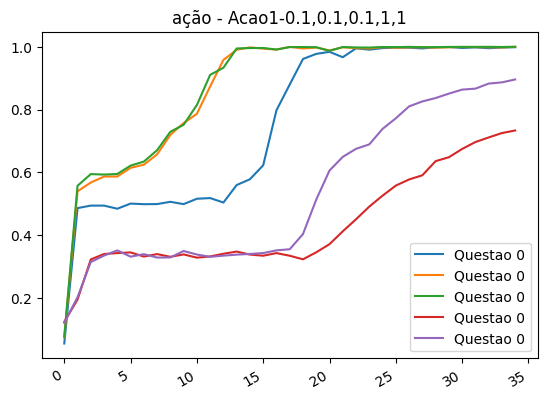

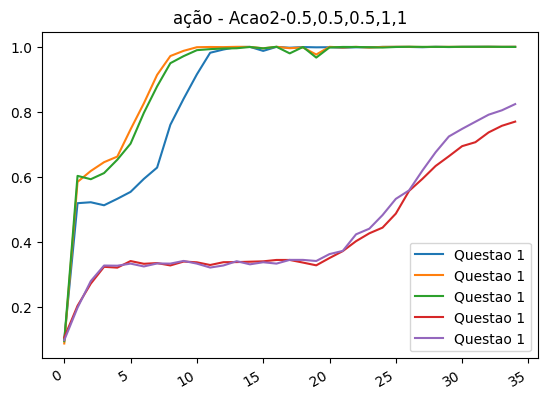

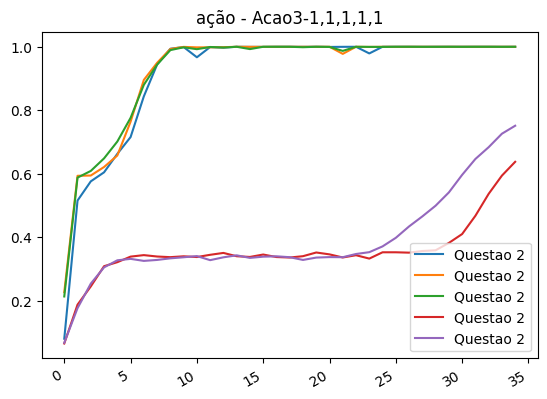

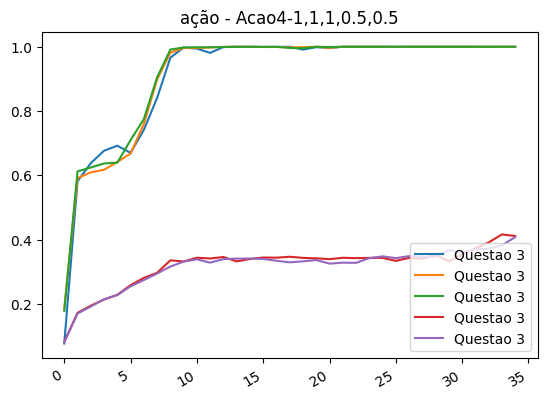

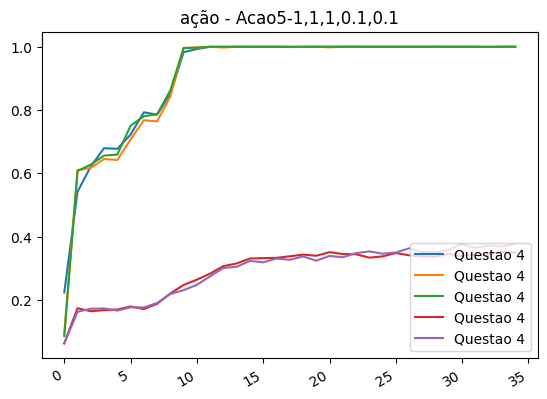

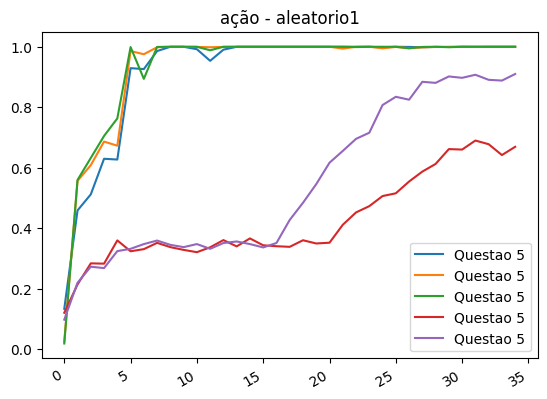

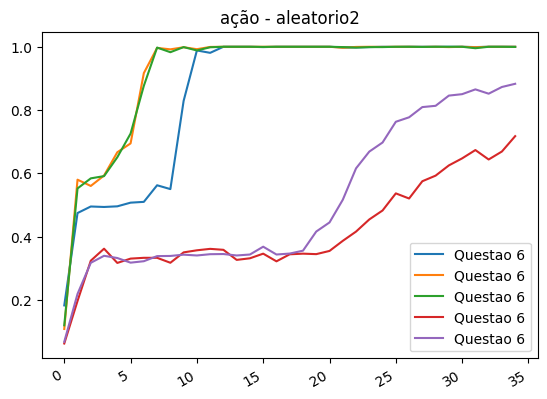

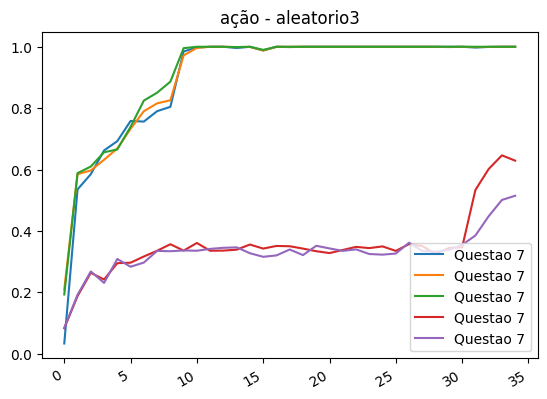

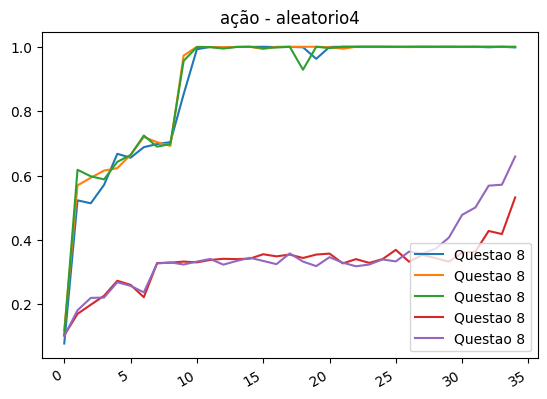

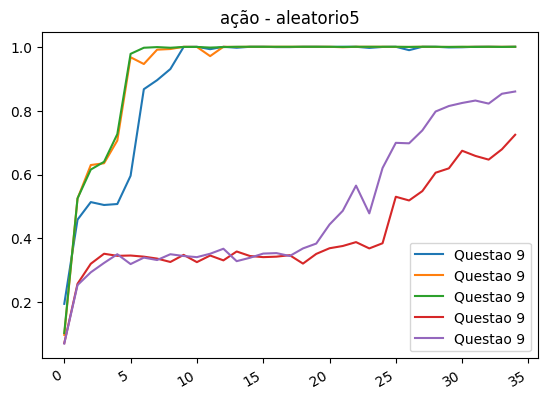

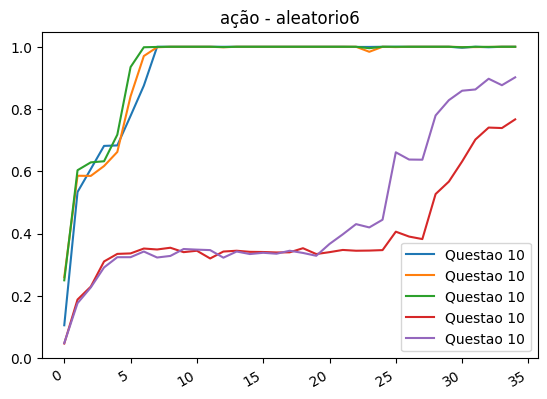

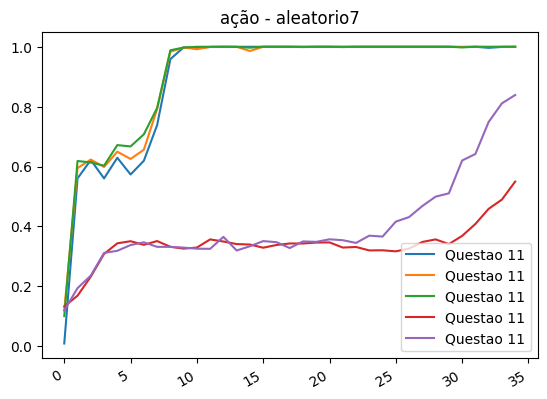

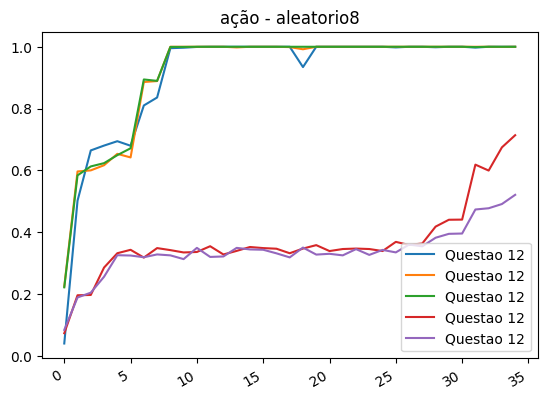

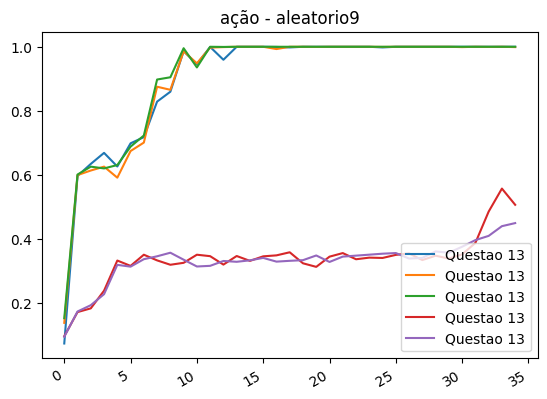

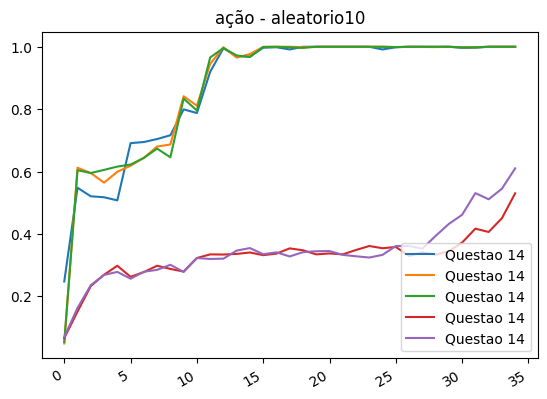

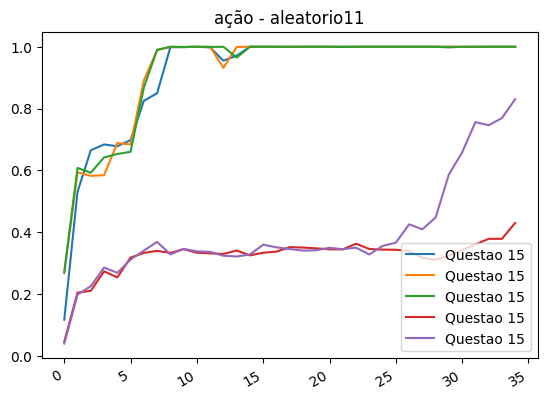

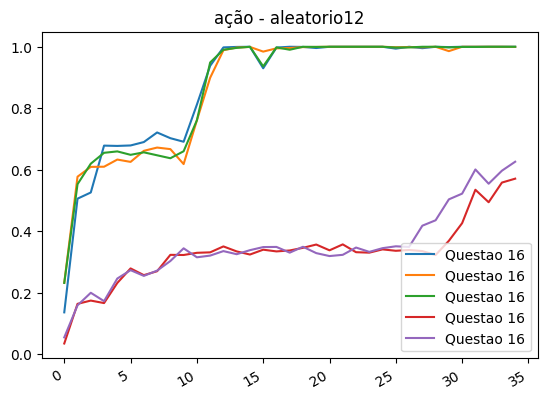

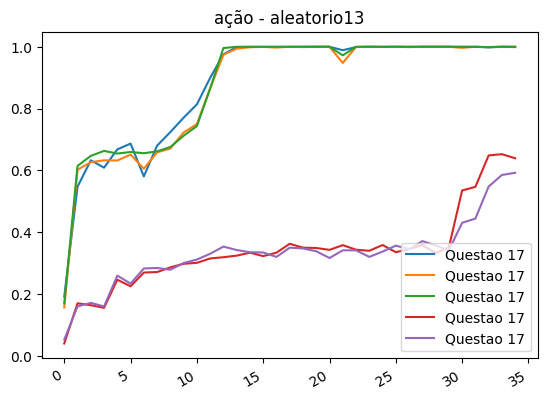

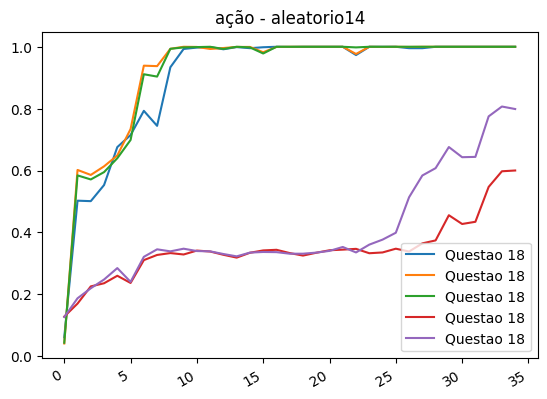

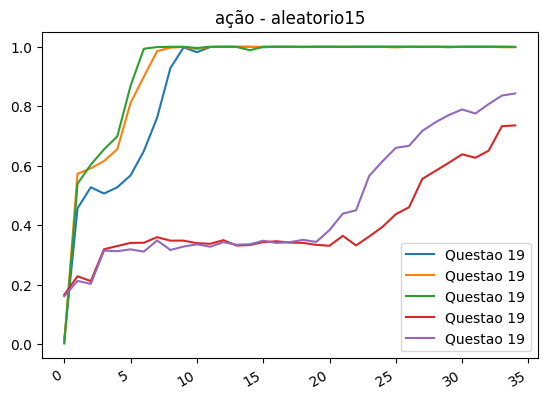

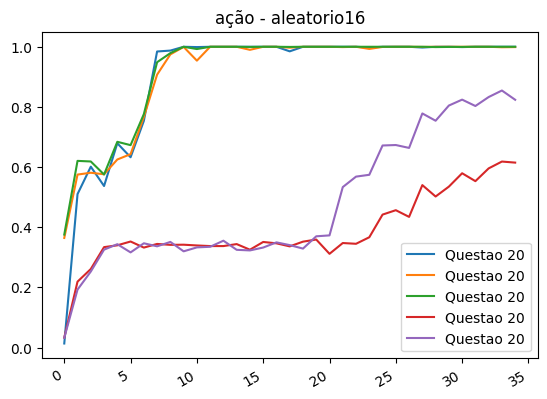

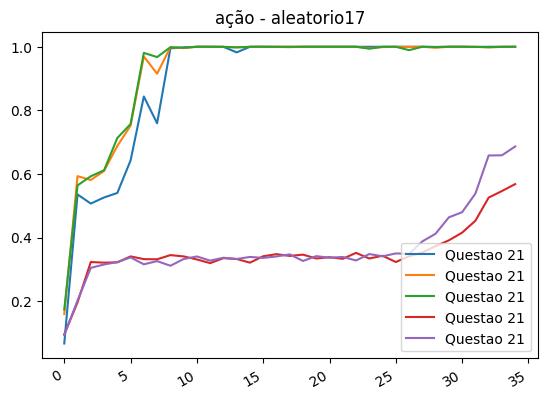

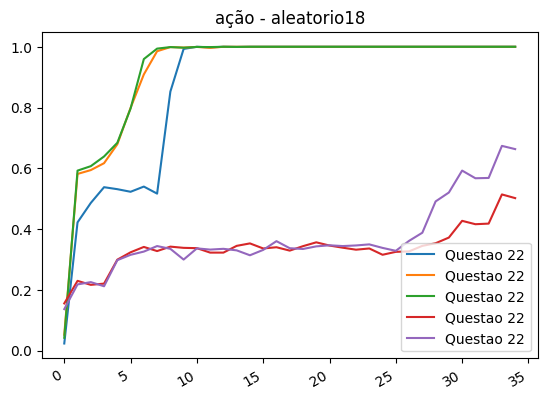

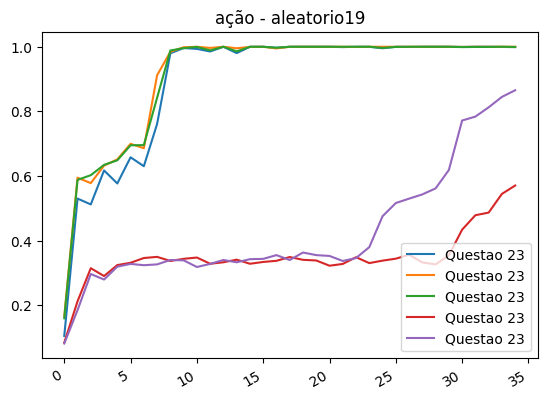

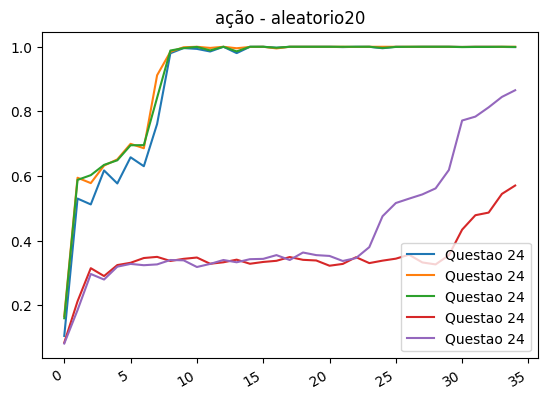

In [34]:
dataRel = generateDataToRels(epsodios,5)

gerarRelatorio(dataRel)

In [35]:
def plotDataAnalise (Qpoliticas, criterion,qtdAnalise) :


  V = []
  contador=-1
   
  for Q_ in Qpoliticas: 
    Q_ = Q_[:qtdAnalise] 
    contador+=1
    if criterion == 'MIN':
      plt.plot(np.min(Q_,axis=1),label='Politica :{}'.format(contador))
      V.append( np.sum(np.min(Q_,axis=1) ) )
    elif criterion == 'MAX':
      plt.plot(np.max(Q_,axis=1),label='Politica :{}'.format(contador))
      V.append( np.sum(np.max(Q_,axis=1) ) )
    elif criterion == 'AVERAGE':
      plt.plot(np.average(Q_,axis=1),label='P,olitica :{}'.format(contador))
      V.append( np.sum(np.average(Q_,axis=1) ) )
    elif criterion == 'MIN_LAST':
      plt.plot(np.min(Q_,axis=1),label='P,olitica :{}'.format(contador))
      V.append( np.min(Q_[-1]) )
   
    elif criterion == 'MAX_LAST':
      plt.plot(np.max(Q_,axis=1),label='Politica :{}'.format(contador))
      V.append( np.max(Q_[-1]) )
    elif criterion == 'AVERAGE_LAST':
      plt.plot(np.average(Q_,axis=1),label='Politica :{}'.format(contador))
      V.append( np.average(Q_[-1]) )

    else:
      print('BUG BUG BUG')

    plt.legend(loc="upper left")
  plt.show()
  return V




In [36]:
def GenerateDataToGraficAnalise(epsodios): 
    cont = -1 
    epsodiosEvaluation = []
    #print(len(epsodios))
    for e in range(len(epsodios)):
        ep=[] 
        for i in range(len(epsodios[e])) :
            ep.append(ast.literal_eval(epsodios[e]["concat"][i]  ))
        epsodiosEvaluation.append(ep)
    return epsodiosEvaluation

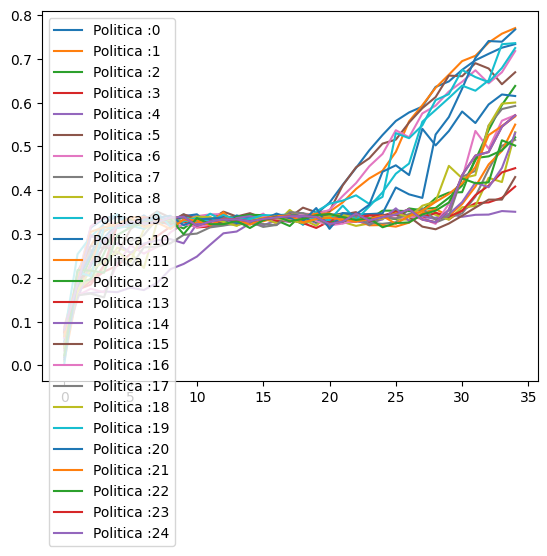

Minimo -[15.06033, 14.801649999999999, 12.29673, 10.96402, 9.948049999999999, 14.64995, 14.56127, 11.44154, 11.19506, 14.41251, 13.64847, 11.652849999999999, 11.78337, 11.325519999999997, 11.23091, 11.19794, 11.44046, 11.35004, 11.956439999999999, 13.87153, 13.375219999999999, 12.11581, 11.53607, 12.053659999999999, 12.053659999999999]


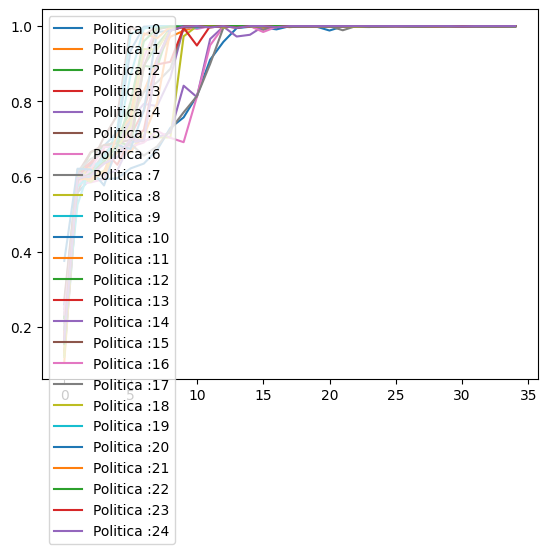

Maximo -[30.51442, 32.065020000000004, 32.3921, 32.17929, 32.0084, 32.76429, 32.22787, 32.0685, 31.38583, 32.68336, 32.823170000000005, 31.80634, 32.322739999999996, 31.85934, 31.046169999999996, 32.49589, 31.00994, 30.998689999999996, 32.20024, 32.55543, 32.29484, 32.38472, 32.42483, 31.93336, 31.93336]


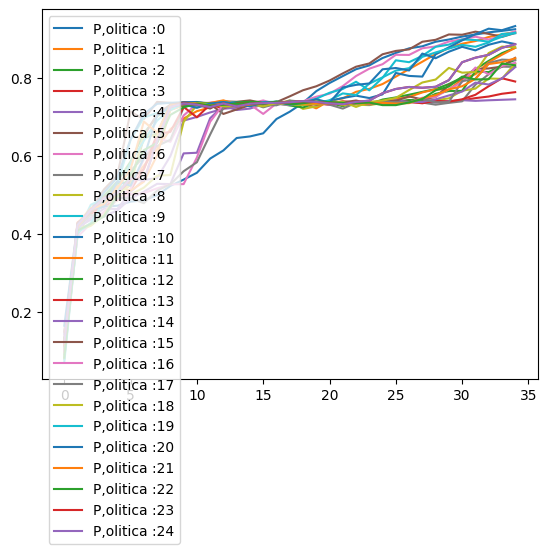

Avarage -[24.146896, 24.892696, 24.511329999999997, 23.613862, 23.13301, 26.22329, 25.328618, 23.866632, 23.376166, 25.611424000000007, 25.491368, 24.114836000000004, 24.169253999999995, 23.67786, 23.032198, 24.308176000000003, 23.127988, 23.085642, 24.32956, 25.183369999999996, 25.237129999999997, 24.237335999999996, 23.943395999999996, 24.446510000000004, 24.446510000000004]


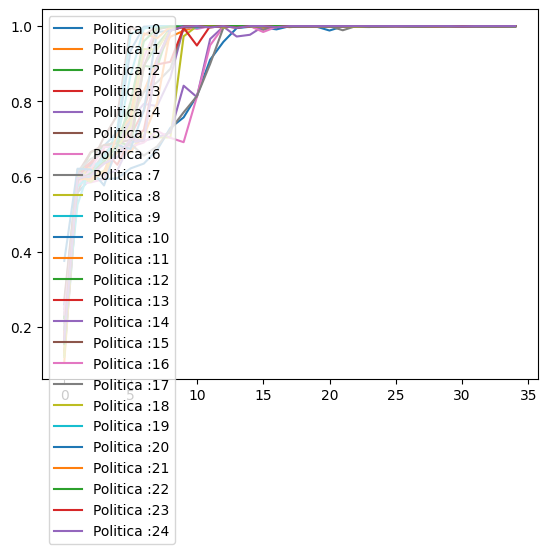

Maximo LAST -[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99949, 1.0, 1.0, 1.0, 1.0, 1.0]


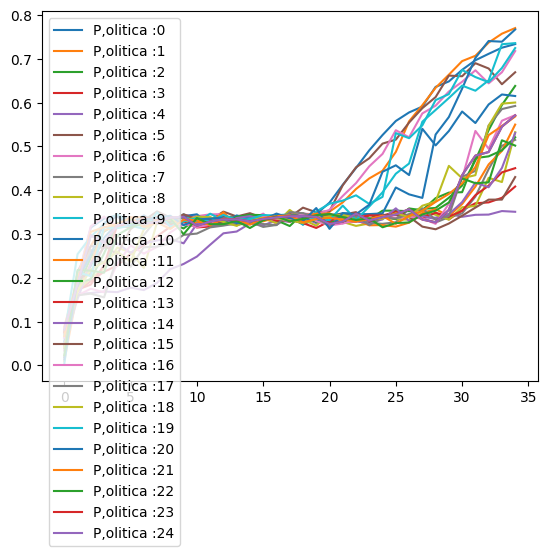

Minimo LAST -[0.73351, 0.77008, 0.638, 0.40832, 0.35068, 0.6692, 0.71768, 0.51492, 0.53236, 0.72447, 0.76682, 0.54977, 0.52071, 0.45028, 0.5306, 0.43002, 0.57128, 0.59231, 0.6001, 0.73573, 0.61496, 0.56818, 0.50177, 0.57078, 0.57078]


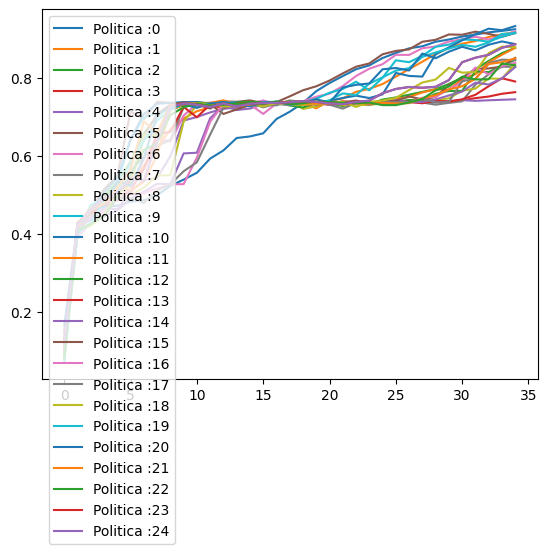

Avarage LAST -[0.925584, 0.918662, 0.87787, 0.7639520000000001, 0.745592, 0.915832, 0.9200459999999999, 0.828832, 0.8378180000000001, 0.9168860000000001, 0.933738, 0.877732, 0.846884, 0.79132, 0.828224, 0.8521179999999999, 0.8394299999999999, 0.8461299999999999, 0.879778, 0.9152660000000001, 0.887556, 0.850934, 0.83298, 0.8869640000000001, 0.8869640000000001]


[1.0, 1.0, 1.0, 0.78087, 0.81123]

In [37]:

epsodiosEvaluation = GenerateDataToGraficAnalise(epsodios)


#np.min(dataRel,axis=1)
min_data = plotDataAnalise (epsodiosEvaluation, 'MIN',35)
print("Minimo -{}".format(min_data))

max_data = plotDataAnalise (epsodiosEvaluation, 'MAX',35)
print("Maximo -{}".format(max_data))

avarage_last_data = plotDataAnalise (epsodiosEvaluation, 'AVERAGE',35)
print("Avarage -{}".format(avarage_last_data))


max_last_data = plotDataAnalise (epsodiosEvaluation, 'MAX_LAST',35)
print("Maximo LAST -{}".format(max_last_data))

min_last_data = plotDataAnalise (epsodiosEvaluation, 'MIN_LAST',35)
print("Minimo LAST -{}".format(min_last_data))



avarage_data = plotDataAnalise (epsodiosEvaluation, 'AVERAGE_LAST',35)
print("Avarage LAST -{}".format(avarage_data))

#dataRel[0]
epsodiosEvaluation[4][67]


In [38]:

MelhorMin = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\MelhorMin.csv')
MelhorMin.head()

,0,/content/drive/MyDrive/Colab Notebooks/CodigoPesquisa/Execution/TesteDQN_ExecuaoDoMelhorMin,0.16,0.08616161616161616,0.10393541876892028,0.04334677419354839,0.04244567963617989,0.11764705882352941,0.12355017650025214,"0.1,0.1,0.1,1,1",DQN,0.1,0.2,0.3
0,1500,/content/drive/MyDrive/Colab Notebooks/CodigoP...,0.27,0.386667,0.424319,0.542843,0.533603,0.213489,0.218356,"0.1,0.1,0.1,1,1",DQN,0,0,0
1,3000,/content/drive/MyDrive/Colab Notebooks/CodigoP...,0.37,0.446465,0.497982,0.558468,0.537140,0.324544,0.313666,"0.1,0.1,0.1,1,1",DQN,0,0,0
2,4500,/content/drive/MyDrive/Colab Notebooks/CodigoP...,0.36,0.468586,0.506559,0.576109,0.598787,0.320487,0.340393,"0.1,0.1,0.1,1,1",DQN,0,0,0
3,6000,/content/drive/MyDrive/Colab Notebooks/CodigoP...,0.38,0.464444,0.501009,0.597782,0.589692,0.307809,0.325265,"0.1,0.1,0.1,1,1",DQN,0,0,0
4,7500,/content/drive/MyDrive/Colab Notebooks/CodigoP...,0.40,0.469697,0.479818,0.607863,0.595250,0.352941,0.312153,"0.1,0.1,0.1,1,1",DQN,0,0,0


In [39]:
df2 = MelhorMin.drop(MelhorMin.columns[[ 1, 2,3,9,10,11,12,13]],axis = 1)
df2.head() 
 
      


,0,0.10393541876892028,0.04334677419354839,0.04244567963617989,0.11764705882352941,0.12355017650025214
0,1500,0.424319,0.542843,0.533603,0.213489,0.218356
1,3000,0.497982,0.558468,0.537140,0.324544,0.313666
2,4500,0.506559,0.576109,0.598787,0.320487,0.340393
3,6000,0.501009,0.597782,0.589692,0.307809,0.325265
4,7500,0.479818,0.607863,0.595250,0.352941,0.312153


Text(0.5, 1.0, 'ação - Melhor minímo')

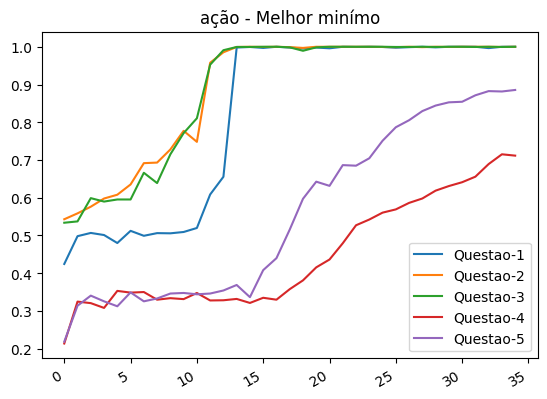

In [40]:
df2.iloc[:,0]

i = 1
figure, ax1 = plt.subplots()
while i <= 5 :
    ax1.plot(df2.iloc[:,i], label = "Questao-"+str(i))
    i+=1
#figure.autofmt_xdate() 

#for acao in range ( 5 ) : 
#ax.plot(df2[:1])
     
#    ax.set_title('ação - {}'.format(acoes[i]) )
plt.legend(loc="lower right")
figure.autofmt_xdate() 
ax1.set_title('ação - {}'.format("Melhor minímo") )